<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Coursera/c2_w2_2_CatAndDog_classification_with_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Setup

import os
import zipfile
import random
import tensorflow as tf

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

In [6]:
# Download dataset

!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip" \
    -O "/tmp/cats-and-dogs.zip"

local_zip = '/tmp/cats-and-dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

--2021-04-26 04:18:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.54.48.114, 2600:1409:d000:58f::e59, 2600:1409:d000:591::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.54.48.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.68M   150MB/s    in 5.4s    

2021-04-26 04:18:41 (146 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824894548/824894548]



In [7]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

12501
12501


In [8]:
# /tmp/cats-and-dogs

# os.mkdir
data_dir = '/tmp/cats-and-dogs'
training_dir = '/tmp/cats-and-dogs/training'
training_cats_dir = '/tmp/cats-and-dogs/training/cats/'
training_dogs_dir = '/tmp/cats-and-dogs/training/dogs/'

validation_dir = '/tmp/cats-and-dogs/validation'
validation_cats_dir = '/tmp/cats-and-dogs/validation/cats/'
validation_dogs_dir = '/tmp/cats-and-dogs/validation/dogs/'
try:
    os.mkdir(data_dir)
    os.mkdir(training_dir)
    os.mkdir(training_cats_dir)
    os.mkdir(training_dogs_dir)
    
    os.mkdir(validation_dir)
    os.mkdir(validation_cats_dir)
    os.mkdir(validation_dogs_dir)
except OSError:
    pass

In [9]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  print('SOURCE : ', SOURCE)
  print('TRAINING : ', TRAINING)
  print('TESTING : ', TESTING)
  dataset = []
  for unitdata in os.listdir(SOURCE):
    path = SOURCE + unitdata
    # print('path : ', path)
    if os.path.getsize(SOURCE + unitdata) > 0:
      dataset.append(unitdata)
    else:
      print('Skipping file as size is 0', unitdata)

  # Shuffle files
  random.sample(dataset, len(dataset))

  # Split training and testing data
  total_count = len(dataset)
  training_count = int(total_count * SPLIT_SIZE)
  validation_count = total_count - training_count

  training_dataset = dataset[0:training_count]
  validation_dataset = dataset[-validation_count:]

  for unitdata in training_dataset:
    source = SOURCE + unitdata
    destination = TRAINING + unitdata
    copyfile(source, destination)

  for unitdata in validation_dataset:
    source = SOURCE + unitdata
    destination = TESTING + unitdata
    copyfile(source, destination)


In [10]:
CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'

In [11]:
split_size = .9
split_data(CAT_SOURCE_DIR, training_cats_dir, validation_cats_dir, split_size)
split_data(DOG_SOURCE_DIR, training_dogs_dir, validation_dogs_dir, split_size)

SOURCE :  /tmp/PetImages/Cat/
TRAINING :  /tmp/cats-and-dogs/training/cats/
TESTING :  /tmp/cats-and-dogs/validation/cats/
Skipping file as size is 0 666.jpg
SOURCE :  /tmp/PetImages/Dog/
TRAINING :  /tmp/cats-and-dogs/training/dogs/
TESTING :  /tmp/cats-and-dogs/validation/dogs/
Skipping file as size is 0 11702.jpg


In [12]:
print('training_cats_dir : ',len(os.listdir(training_cats_dir)))
print('training_dogs_dir : ',len(os.listdir(training_dogs_dir)))
print('validation_cats_dir : ',len(os.listdir(validation_cats_dir)))
print('validation_dogs_dir : ',len(os.listdir(validation_dogs_dir)))

training_cats_dir :  11250
training_dogs_dir :  11250
validation_cats_dir :  1250
validation_dogs_dir :  1250


In [13]:
# Create Model

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

In [15]:
# training_dir validation_dir
TRAINING_DIR = training_dir
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.3,
                                   fill_mode='nearest',
                                   horizontal_flip=True,)
train_generator = train_datagen.flow_from_directory(
  TRAINING_DIR,
  target_size = (150, 150),
  batch_size = 100,
  class_mode = "binary",  
)

VALIDATION_DIR = validation_dir
validation_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.3,
                                   fill_mode='nearest',
                                   horizontal_flip=True,)
validation_generator = validation_datagen.flow_from_directory(
  VALIDATION_DIR,
  target_size = (150, 150),
  batch_size = 100,
  class_mode = "binary",  
)



Found 22498 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=224,
    epochs=10,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=25
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

224/224 [==============================] - 192s 798ms/step - loss: 0.9250 - accuracy: 0.5436 - val_loss: 0.6414 - val_accuracy: 0.6460
Epoch 2/10
224/224 [==============================] - 176s 785ms/step - loss: 0.6447 - accuracy: 0.6368 - val_loss: 0.5940 - val_accuracy: 0.6760
Epoch 3/10
224/224 [==============================] - 175s 779ms/step - loss: 0.5948 - accuracy: 0.6740 - val_loss: 0.5479 - val_accuracy: 0.7208
Epoch 4/10
224/224 [==============================] - 173s 774ms/step - loss: 0.5696 - accuracy: 0.7079 - val_loss: 0.5751 - val_accuracy: 0.7012
Epoch 5/10
224/224 [==============================] - 174s 775ms/step - loss: 0.5478 - accuracy: 0.7227 - val_loss: 0.5088 - val_accuracy: 0.7436
Epoch 6/10
224/224 [==============================] - 173s 772ms/step - loss: 0.5376 - accuracy: 0.7328 - val_loss: 0.4918 - val_accuracy: 0.7488
Epoch 7/10
224/224 [==============================] - 173s 771ms/step - loss: 0.5199 - accuracy: 0.7394 - val_loss: 0.4658 - val_accura

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

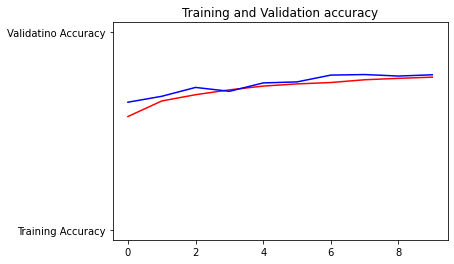

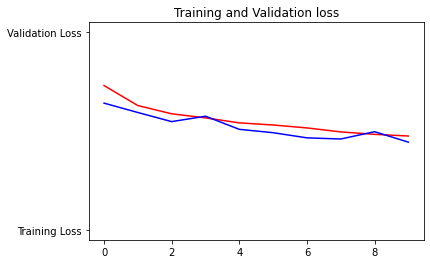

<Figure size 432x288 with 0 Axes>

In [18]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'r', 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', 'Validatino Accuracy')
plt.title('Training and Validation accuracy')
plt.figure()

plt.plot(epochs, loss, 'r', 'Training Loss')
plt.plot(epochs, val_loss, 'b', 'Validation Loss')
plt.title('Training and Validation loss')
plt.figure()

In [19]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

# uploaded = files.upload()

# for fn in uploaded.keys():
 
#   # predicting images
#   path = '/content/' + fn
#   img = image.load_img(path, target_size=(# YOUR CODE HERE))
#   x = image.img_to_array(img)
#   x = np.expand_dims(x, axis=0)

#   images = np.vstack([x])
#   classes = model.predict(images, batch_size=10)
#   print(classes[0])
#   if classes[0]>0.5:
#     print(fn + " is a dog")
#   else:
#     print(fn + " is a cat")